#**Install Requirement Library**

In [22]:
!pip install anytree
!pip install basemap
!pip install mycolorpy

#**Import Library**

In [23]:
import pandas as pd
import numpy as np
import graphviz
import math
import seaborn as sns

from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import Image
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import timedelta, datetime
from mycolorpy import colorlist as mcp

%matplotlib inline

#**Read Dataset**

In [24]:
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
df = pd.read_csv(dataset)
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1968-01-01T07:50:51.240Z,32.958667,-115.863333,6.0,3.08,ml,5.0,166.0,0.7355,0.29,...,2016-01-28T19:54:48.710Z,"24km WSW of Westmorland, CA",earthquake,1.02,31.61,0.179,5.0,reviewed,ci,ci
1,1968-01-01T11:34:43.790Z,33.468333,-120.179500,6.0,2.59,mh,4.0,302.0,1.0440,0.63,...,2016-01-28T19:37:37.050Z,"53km S of Santa Rosa Is., CA",earthquake,5.56,31.61,0.306,12.0,reviewed,ci,ci
2,1968-01-02T09:50:46.470Z,35.705167,-118.039000,6.0,3.09,ml,8.0,84.0,0.3567,0.71,...,2016-01-28T19:33:22.000Z,"22km WNW of Inyokern, CA",earthquake,1.78,31.61,0.155,11.0,reviewed,ci,ci
3,1968-01-02T11:01:19.830Z,35.740667,-118.060833,6.0,2.88,ml,10.0,97.0,0.3452,0.52,...,2016-01-28T19:59:01.740Z,"25km WNW of Inyokern, CA",earthquake,1.13,31.61,0.167,9.0,reviewed,ci,ci
4,1968-01-04T06:12:39.730Z,35.111000,-119.085833,6.0,2.59,ml,9.0,146.0,0.2834,0.45,...,2016-01-28T19:54:49.210Z,"23km SW of Lamont, CA",earthquake,1.03,31.61,0.136,6.0,reviewed,ci,ci


#**Variable Description**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247808 entries, 0 to 247807
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             247808 non-null  object 
 1   latitude         247808 non-null  float64
 2   longitude        247808 non-null  float64
 3   depth            247808 non-null  float64
 4   mag              247808 non-null  float64
 5   magType          247807 non-null  object 
 6   nst              246140 non-null  float64
 7   gap              246006 non-null  float64
 8   dmin             120535 non-null  float64
 9   rms              246054 non-null  float64
 10  net              247808 non-null  object 
 11  id               247808 non-null  object 
 12  updated          247808 non-null  object 
 13  place            247808 non-null  object 
 14  type             247808 non-null  object 
 15  horizontalError  119280 non-null  float64
 16  depthError       208179 non-null  floa

In [26]:
data = df[['depth','mag']]
data.describe()

,depth,mag
count,247808.000000,247808.000000
mean,6.047375,2.016265
std,4.693010,0.645582
min,-2.288000,0.000000
25%,2.718000,1.600000
50%,5.560000,2.060000
75%,8.952000,2.390000
max,89.625000,7.300000


#**Statistical Description of Earthquake Events**

In [27]:
# Total earthquake events
N_tot = df['mag'].count()
print('Total earthquake events **1968 until 2018**', N_tot)
print('Average number of events per week:', round(N_tot/(52*(2018-1968+1)),2) )
print('Average number of events per year:', round(N_tot/((2018-1968+1)),2) )

# List of largest earthquake events
print('The magnitude of the largest earthquake:')
df[['mag','time','place']].sort_values('mag',ascending=False).head(5)

Total earthquake events **1968 until 2018** 247808
Average number of events per week: 93.44
Average number of events per year: 4858.98
The magnitude of the largest earthquake:


,mag,time,place
168133,7.3,1992-06-28T11:57:34.130Z,"Landers, California Earthquake"
227923,7.2,2010-04-04T22:40:42.360Z,"12km SW of Delta, B.C., MX"
201925,7.1,1999-10-16T09:46:44.460Z,"16km SW of Ludlow, CA"
186128,6.7,1994-01-17T12:30:55.390Z,"1km NNW of Reseda, CA"
64973,6.7,1983-05-02T23:42:38.060Z,Central California


In [28]:
#Object Date Time
df['dt_time'] = df['time'].apply(lambda x:
                                 datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%fZ'))

# Column year, month, and day
df['dofy'] = df['dt_time'].apply(lambda x: x.strftime("%j"))
df['dofy'] = df['dofy'].astype(str).astype(int)

df['year'] = df['dt_time'].apply(lambda x: x.year)
df['month'] = df['dt_time'].apply(lambda x: x.month)
df['day'] = df['dt_time'].apply(lambda x: x.day)

# Calculate the number of earthquake events per time (DMY)
dofy_tot = df['dofy'].value_counts(sort=True)
dofy_tot.sort_index(axis=0, inplace=True)

year_tot = df['year'].value_counts(sort=True)
month_tot = df['month'].value_counts(sort=True)
day_tot = df['day'].value_counts(sort=True)

# Calculate the number of earthquake events per time (DMY)
year_ave = year_tot.mean()
dofy_ave = dofy_tot.mean()
month_ave = month_tot.mean()

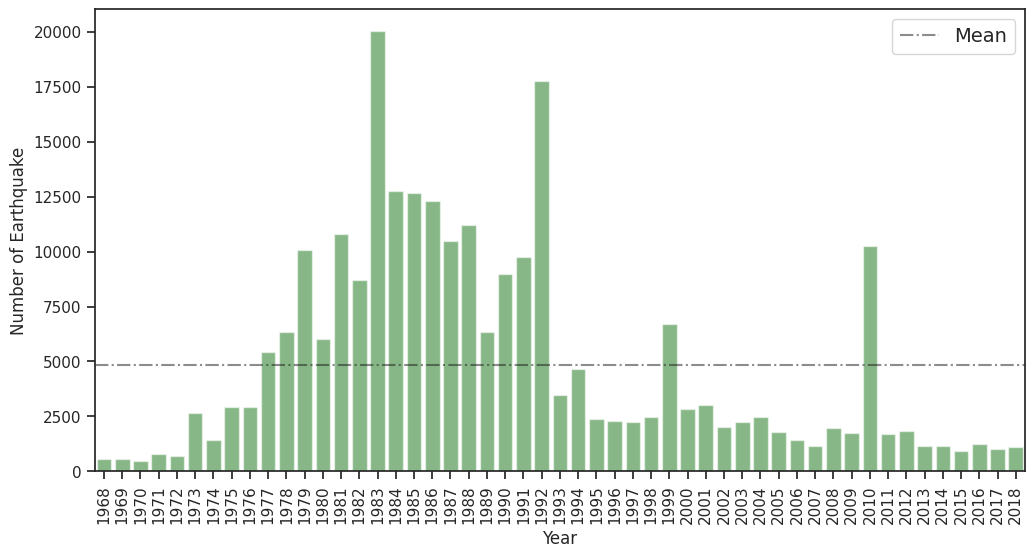

In [29]:
# Plot Bar Chart
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 14

plt.figure(figsize=(12,6))

sns.barplot(x=year_tot.index, y=year_tot.values, alpha=0.5, color='green')
plt.axhline(y=year_ave, color='k', linestyle='-.',
            alpha=0.5, label='Mean')
plt.xlabel('Year'), plt.ylabel('Number of Earthquake')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


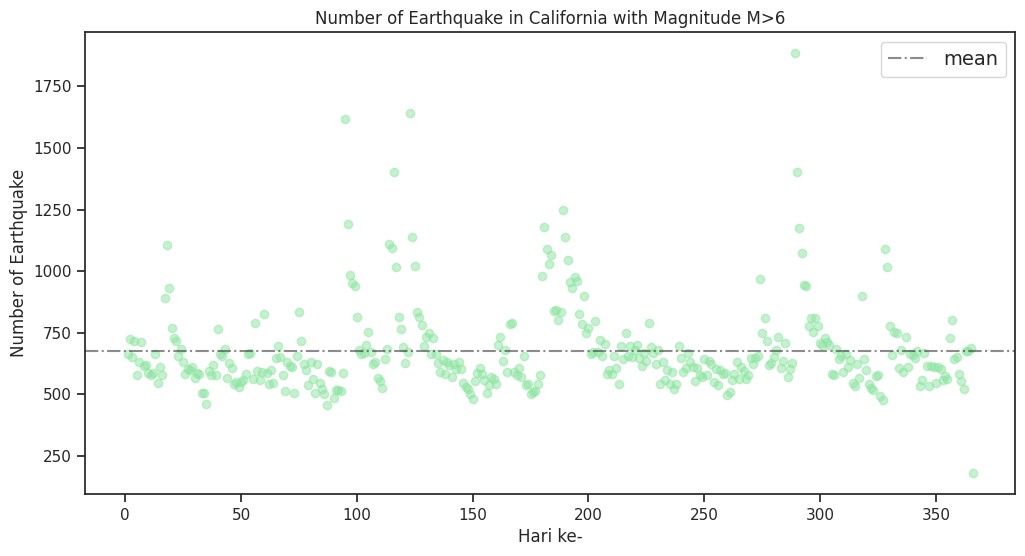

In [30]:
plt.figure(figsize=(12,6))

plt.plot(dofy_tot.index, dofy_tot.values ,'go', alpha=0.5)
plt.axhline(y=dofy_ave, color='k',linestyle='-.',alpha=0.5,label='mean')
plt.ylabel('Number of Earthquake'), plt.xlabel('Hari ke-')
plt.title('Number of Earthquake in California with Magnitude M>6')
plt.legend()
plt.show()

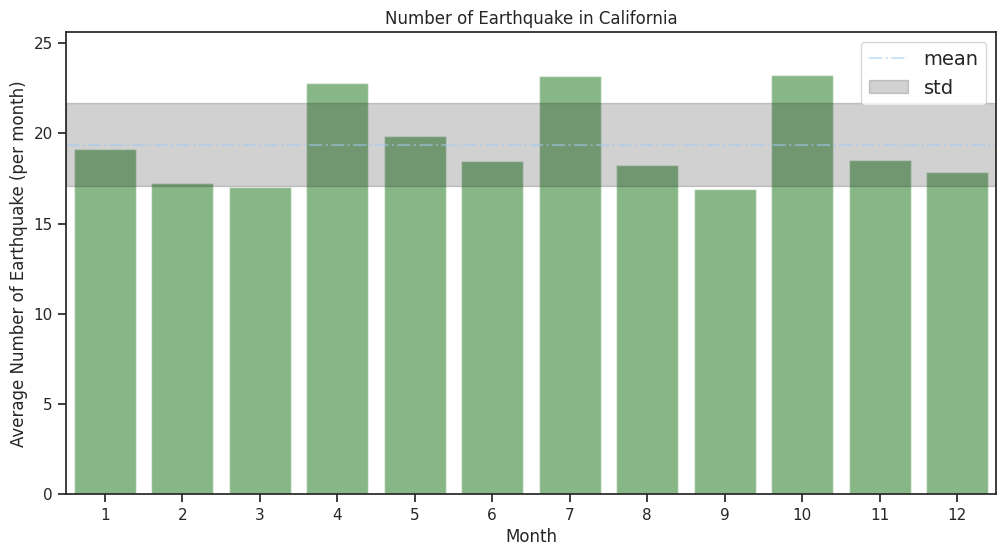

In [31]:
# Array of month lengths
month_length = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
# Sort by month index
month_sort = month_tot.sort_index()
# Normalize by the length of the month
month_norm = month_sort.values / (month_length*(2017-1983+1))

# Plot (including daily average and the deviation)
plt.figure(figsize=(12,6))

ax = sns.barplot(x=month_sort.index, y=month_norm, alpha=0.5, color='green')
ax.set_ylim([0, 25.6])
plt.axhline(y=np.mean(month_norm), color='b', linestyle='-.',
            alpha=0.5, label='mean')
plt.axhspan(np.mean(month_norm)-np.std(month_norm),
            np.mean(month_norm)+np.std(month_norm),
            color='k', alpha=0.2, label='std')
plt.ylabel('Average Number of Earthquake (per month)'), plt.xlabel('Month')
plt.title('Number of Earthquake in California')
plt.legend()
plt.show()

#**Earthquake Location Visualization**

In [32]:
import folium
import pandas as pd

# GitHub
github_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"

# Read dataset
df = pd.read_csv(github_url, sep=',')

# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Calculate the center of the earthquake data region
center_lat = (max_lat + min_lat) / 2
center_lon = (max_lon + min_lon) / 2

# Calculate the appropriate zoom level to focus on the region with earthquake data
zoom_level = 8

# Create a map with the center location of the earthquake data area
m = folium.Map(location=[center_lat, center_lon], zoom_start=zoom_level)

# Determine the appropriate magnitude and color ranges
magnitude_ranges = [(4, 5, 'blue', 'Magnitude 4-5'),
                   (5.1, 6, 'green', 'Magnitude 5.1-6'),
                   (6.1, 7, 'orange', 'Magnitude 6.1-7'),
                   (7.1, 9, 'red', 'Magnitude 7.1-9')]

# Add a marker for each earthquake on the map
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data = df[(df['mag'] >= min_mag) & (df['mag'] <= max_mag)]
    for index, row in mag_data.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=3,  # Ukuran marker
            color=color,  # Warna marker
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=f"Mag: {row['mag']}, Depth: {row['depth']} km"  # Informasi dalam popup
        ).add_to(m)

# Added a legend to the map with a vertical bar in the bottom left corner
legend_html = """
     <div style="position: fixed;
                 bottom: 100px; left: 10px; width: 200px; height: 160px;
                 background-color: white; opacity: 0.7; z-index:9999; font-size:12px; text-align:center; padding: 5px;">
     <p><b>Legend</b></p>
     <div style="background-color: blue; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 4-5<br>
     <div style="background-color: green; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 5.1-6<br>
     <div style="background-color: orange; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 6.1-7<br>
     <div style="background-color: red; width: 20px; height: 20px; display: inline-block;"></div>Magnitudo: 7.1-9<br>
      </div>
     """

m.get_root().html.add_child(folium.Element(legend_html))

# save to HTML file
m.save("california_earthquake_map.html")

# display in notebook
m


##**Frequency**

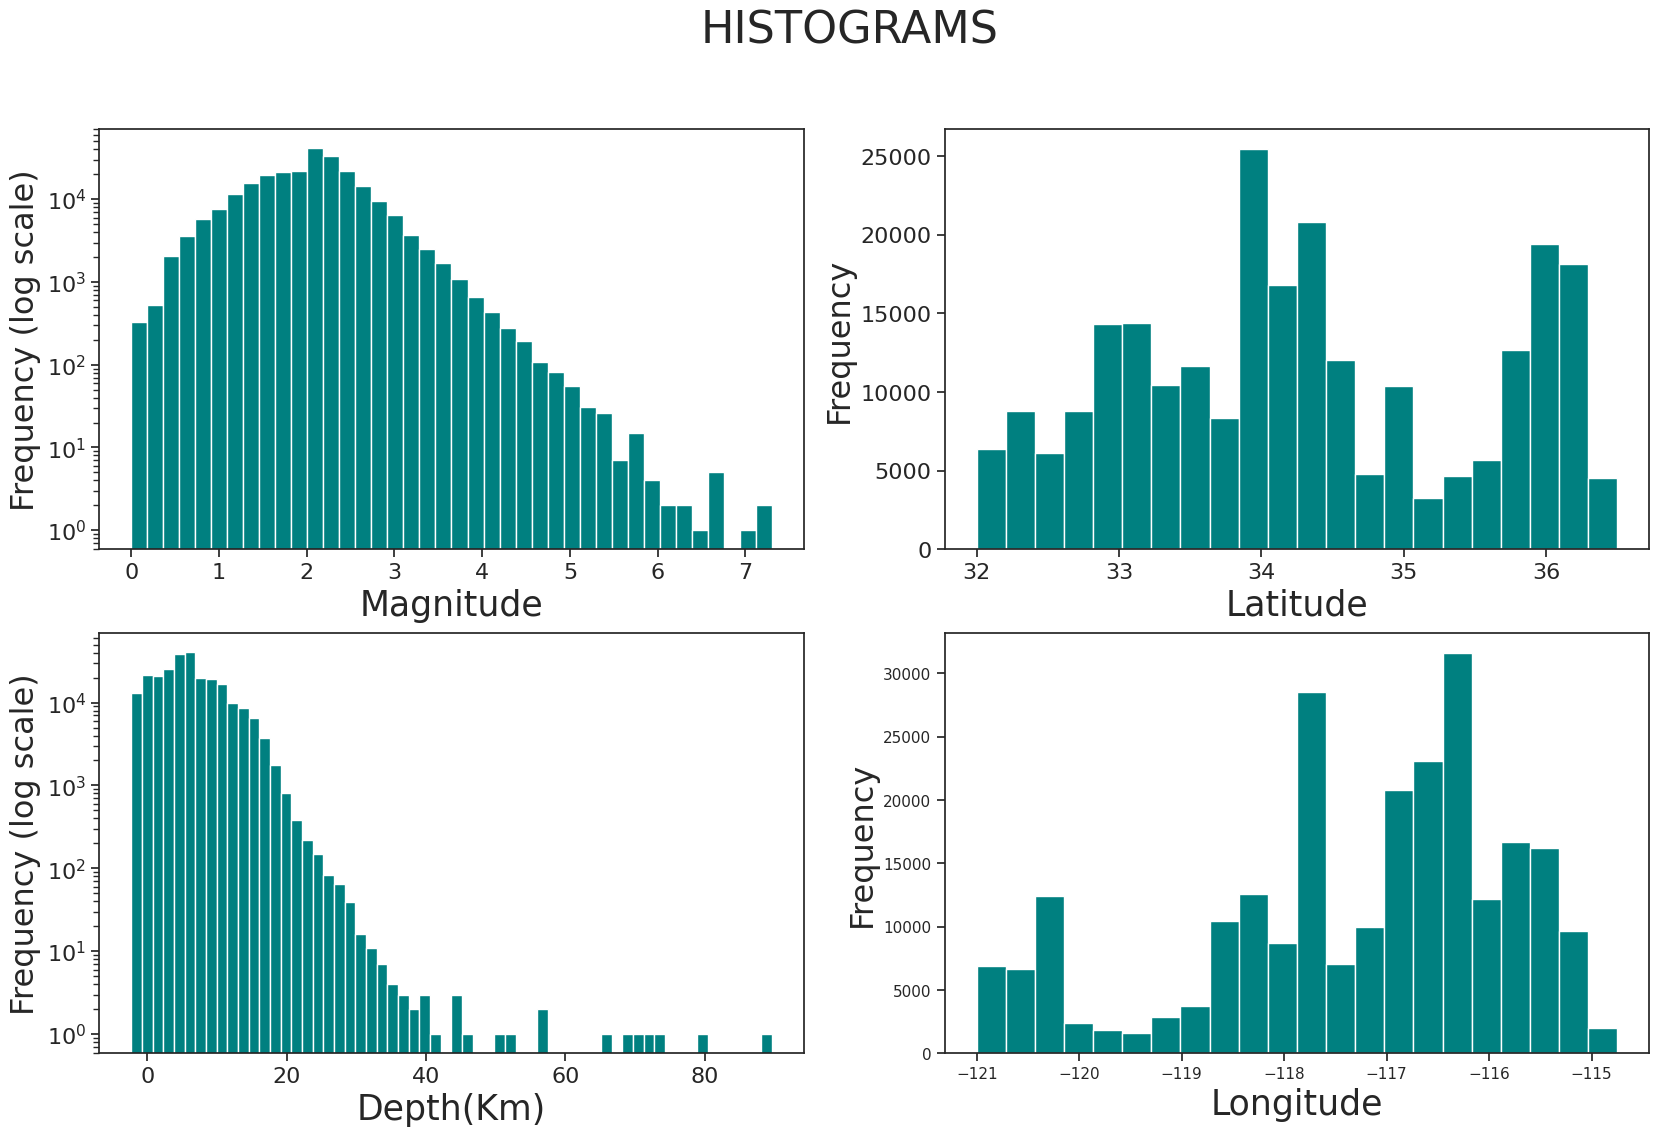

In [33]:
#fig=plt.figure()
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('HISTOGRAMS',fontsize=32)
# Draw a nested boxplot
axes[0][0].hist(df['mag'],bins=40,color='teal')
axes[1][0].hist(df['depth'],bins=60,color='teal')
axes[0][1].hist(df['latitude'],bins=22,color='teal')
axes[1][1].hist(df['longitude'],bins=22,color='teal')
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            title = ax.set_xlabel("Magnitude",fontsize=25) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23) #set font and title of y label
            ax.set_yscale('log') #set log scale
            ax.tick_params(labelsize=16) #change labelsize
        elif i == 1 and j==0:
            title = ax.set_xlabel("Depth(Km)",fontsize=25)
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23)
            ax.set_yscale('log')
            ax.tick_params(labelsize=16)
        elif i == 0 and j==1:
            title = ax.set_xlabel("Latitude",fontsize=25  )
            title2 = ax.set_ylabel("Frequency",fontsize=23)
            ax.tick_params(labelsize=16)
        elif i==1 and j == 1:
            title = ax.set_xlabel("Longitude", fontsize=25 )
            title2 = ax.set_ylabel("Frequency",fontsize=23)


# **Depth, Latitude**

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['latitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Latitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

# **Depth, Longitude**

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['longitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Longitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize